In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_circles
from sklearn.metrics import accuracy_score
from tqdm import tqdm
import h5py

In [12]:
def initialisation(n0, n1, n2):
    W1 = np.random.randn(n1, n0)
    b1 = np.random.randn(n1, 1)
    W2 = np.random.randn(n2, n1)
    b2 = np.random.randn(n2, 1)
    
    parametres = {
        'W1': W1,
        'b1': b1,
        'W2': W2,
        'b2': b2
    }
    
    return parametres

In [13]:
def forward_propagation(X, parametres):
    W1 = parametres['W1']
    b1 = parametres['b1']
    W2 = parametres['W2']
    b2 = parametres['b2']
    
    Z1 = W1.dot(X) + b1
    A1 = 1 / (1 + np.exp(-Z1)) 
    Z2 = W2.dot(A1) + b2
    A2 = 1 / (1 + np.exp(-Z2))
    
    activations = {
        'A1': A1,
        'A2': A2
    }
    
    return activations

In [14]:
def back_propagation(X, y, activations, parametres):
    A1 = activations['A1']
    A2 = activations['A2']
    W2 = parametres['W2']
    
    m = y.shape[1]
    
    # Gradient de la seconde couche
    dZ2 = A2 - y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2, axis=1, keepdims=True)
    
    # Gradient de la première couche
    dZ1 = np.dot(W2.T, dZ2) * A1 * (1 - A1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1, axis=1, keepdims=True)
    
    gradients = {
        'dW1': dW1,
        'db1': db1,
        'dW2': dW2,
        'db2': db2
    }
    
    return gradients

In [15]:
def update(gradients, parametres, learning_rate):

    W1 = parametres['W1']
    b1 = parametres['b1']
    W2 = parametres['W2']
    b2 = parametres['b2']

    dW1 = gradients['dW1']
    db1 = gradients['db1']
    dW2 = gradients['dW2']
    db2 = gradients['db2']

    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2

    parametres = {
        'W1': W1,
        'b1': b1,
        'W2': W2,
        'b2': b2
    }

    return parametres

In [16]:
def predict(X, parametres):
    activations = forward_propagation(X, parametres)
    A2 = activations['A2']
    return A2 >= 0.5

In [17]:
def log_loss(A, y):
    epsilon = 1e-15
    return 1 / len(y) * np.sum(-y * np.log(A + epsilon) - (1 - y) * np.log(1 - A + epsilon))

In [18]:
def neural_network(X_train, y_train, n1=32, learning_rate = 0.1, n_iter = 1000):

    # initialisation parametres
    # n0 = nombre entrées du réseau
    # n1 = nombre de neurones dans la couche 1
    # n2 = nombre de neurones dans la couche 2 (sortie)
    n0 = X_train.shape[0]
    n2 = y_train.shape[0]
    parametres = initialisation(n0, n1, n2)

    train_loss = []
    train_acc = []

    for i in tqdm(range(n_iter)):
        
        activations = forward_propagation(X_train, parametres)
        gradients = back_propagation(X_train, y_train, activations, parametres)
        parametres = update(gradients, parametres, learning_rate)
        
        if i % 10 == 0:
            train_loss.append(log_loss(y_train, activations['A2']))
            y_pred = predict(X_train, parametres)
            current_accuracy = accuracy_score(y_train.flatten(), y_pred.flatten())
            train_acc.append(current_accuracy)
        

    plt.figure(figsize=(14, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(train_loss, label='train loss')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(train_acc, label='train acc')
    plt.legend()
    plt.show()

    return parametres

dimensions de X: (2, 1000)
dimensions de y: (1, 1000)


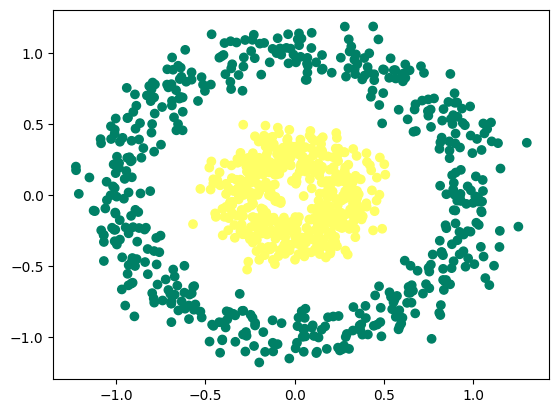

In [35]:
X, y = make_circles(n_samples=1000, noise=0.1, factor=0.3, random_state=0)
X = X.T
y = y.reshape((1, y.shape[0]))

print('dimensions de X:', X.shape)
print('dimensions de y:', y.shape)

plt.scatter(X[0, :], X[1, :], c=y, cmap='summer')
plt.show()

100%|██████████| 1000/1000 [00:00<00:00, 2057.17it/s]


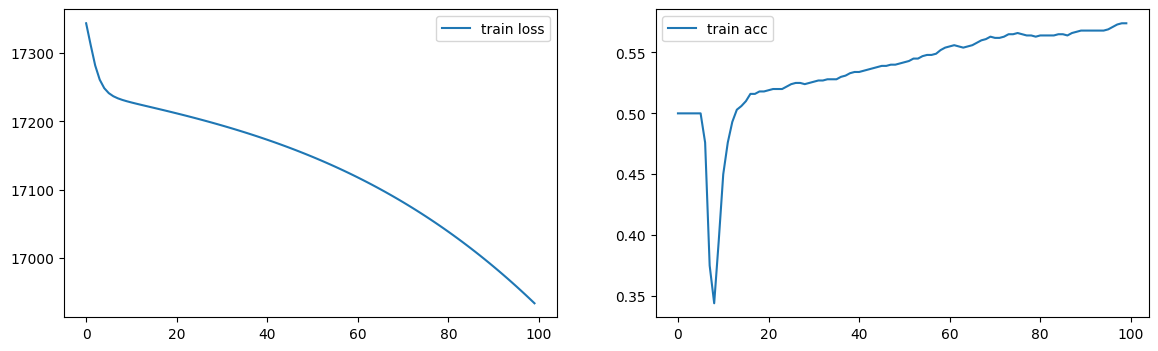

In [20]:
parametres = neural_network(X, y, n1=2, learning_rate=0.1, n_iter=1000)

In [21]:
def load_data():
    train_dataset = h5py.File('datasets/trainset.hdf5', "r")
    X_train = np.array(train_dataset["X_train"][:]) # your train set features
    y_train = np.array(train_dataset["Y_train"][:]) # your train set labels

    test_dataset = h5py.File('datasets/testset.hdf5', "r")
    X_test = np.array(test_dataset["X_test"][:]) # your train set features
    y_test = np.array(test_dataset["Y_test"][:]) # your train set labels
    
    return X_train, y_train, X_test, y_test

In [22]:
X_train, y_train, X_test, y_test = load_data()

In [23]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1000, 64, 64)
(200, 64, 64)
(1000, 1)
(200, 1)


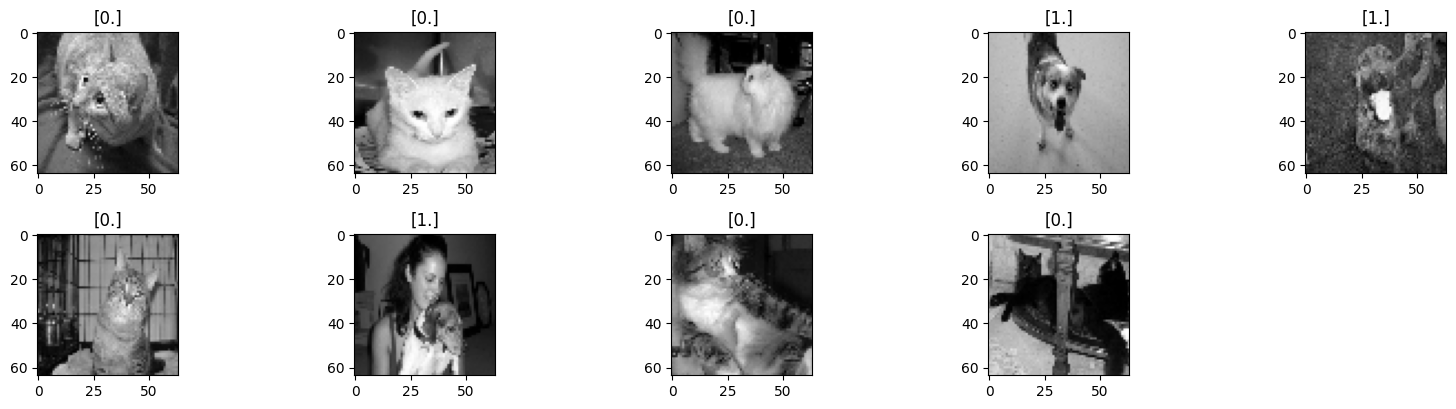

In [24]:
plt.figure(figsize=(16, 8))
for i in range(1, 10):
    plt.subplot(4, 5, i)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(y_train[i])
    plt.tight_layout()
plt.show()

In [49]:
y_train = y_train.T
y_test = y_test.T

X_train = X_train.T
X_train_reshape = X_train.reshape(-1, X_train.shape[-1]) / X_train.max()

X_test = X_test.T
X_test_reshape = X_test.reshape(-1, X_test.shape[-1]) / X_train.max()

m_train = 300
m_test = 80
X_test_reshape = X_test_reshape[:, :m_test]
X_train_reshape = X_train_reshape[:, :m_train]
y_train = y_train[:, :m_train]
y_test = y_test[:, :m_test]

print(X_train_reshape.shape)
print(X_test_reshape.shape)
print(y_train.shape)
print(y_test.shape)


y_train = y_train.T

X_train = X_train.T
X_train_reshape = X_train.reshape(-1, X_train.shape[-1]) / X_train.max()
X_train_reshape = X_train_reshape[:, :m_train]
y_train = y_train[:, :m_train]

(1000, 2)
(4096, 80)
(300, 1)
(1, 80)


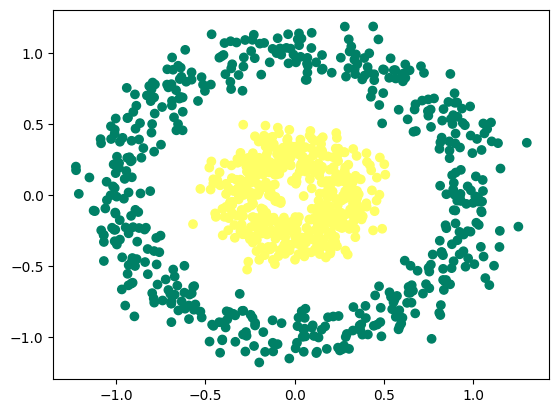

In [54]:
X_train, y_train = make_circles(n_samples=1000, noise=0.1, factor=0.3, random_state=0)
X_train = X_train.T
y_train = y_train.reshape((1, y_train.shape[0]))

m_train = 1000
X = X_train[:, :m_train]
y = y_train[:, :m_train]

plt.scatter(X[0, :], X[1, :], c=y, cmap='summer')
plt.show()

In [26]:
def neural_network2(X_train, y_train, X_test, y_test, n1=32, learning_rate = 0.1, n_iter = 1000):

    # initialisation parametres
    # n0 = nombre entrées du réseau
    # n1 = nombre de neurones dans la couche 1
    # n2 = nombre de neurones dans la couche 2 (sortie)
    n0 = X_train.shape[0]
    n2 = y_train.shape[0]
    parametres = initialisation(n0, n1, n2)
    
    #n0_test = X_test.shape[0]
    #n2_test = y_test.shape[0]
    #parametres_test = initialisation(n0_test, n1, n2_test)

    train_loss = []
    train_acc = []
    
    test_loss = []
    test_acc = []

    for i in tqdm(range(n_iter)):
        
        activations = forward_propagation(X_train, parametres)
        gradients = back_propagation(X_train, y_train, activations, parametres)
        parametres = update(gradients, parametres, learning_rate)
        
        if i % 10 == 0:
            # Train :
            train_loss.append(log_loss(y_train, activations['A2']))
            y_pred = predict(X_train, parametres)
            current_accuracy = accuracy_score(y_train.flatten(), y_pred.flatten())
            train_acc.append(current_accuracy)
            
            # Test :
            activations_test = forward_propagation(X_test, parametres)
            test_loss.append(log_loss(y_test, activations_test['A2']))
            y_pred_test = predict(X_test, parametres)
            current_accuracy_test = accuracy_score(y_test.flatten(), y_pred_test.flatten())
            test_acc.append(current_accuracy_test)
        

    plt.figure(figsize=(14, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(train_loss, label='train loss')
    plt.plot(test_loss, label='test loss')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(train_acc, label='train acc')
    plt.plot(test_acc, label='test acc')
    plt.legend()
    plt.show()

    return parametres

100%|██████████| 1000/1000 [00:58<00:00, 17.15it/s]


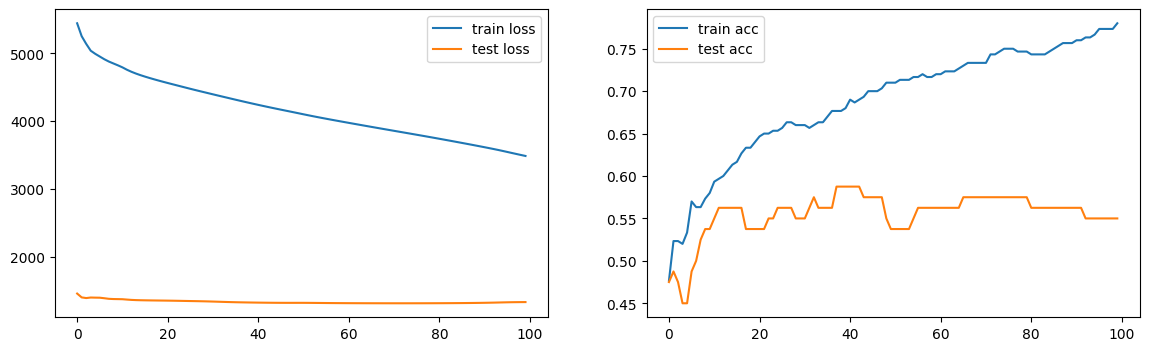

In [27]:
parametres = neural_network2(
    X_train_reshape, y_train, X_test_reshape, y_test, n1=32, learning_rate=0.1, n_iter=1000
)

Réseau plus profond : plus de couche

In [28]:
def initialisation(dimensions):
    
    parametres = {}
    C = len(dimensions)

    np.random.seed(1)

    for c in range(1, C):
        parametres['W' + str(c)] = np.random.randn(dimensions[c], dimensions[c - 1])
        parametres['b' + str(c)] = np.random.randn(dimensions[c], 1)

    return parametres

def forward_propagation(X, parametres):
  
  activations = {'A0': X}

  C = len(parametres) // 2

  for c in range(1, C + 1):

    Z = parametres['W' + str(c)].dot(activations['A' + str(c - 1)]) + parametres['b' + str(c)]
    activations['A' + str(c)] = 1 / (1 + np.exp(-Z))

  return activations

def back_propagation(y, parametres, activations):

  m = y.shape[1]
  C = len(parametres) // 2

  dZ = activations['A' + str(C)] - y
  gradients = {}

  for c in reversed(range(1, C + 1)):
    gradients['dW' + str(c)] = 1/m * np.dot(dZ, activations['A' + str(c - 1)].T)
    gradients['db' + str(c)] = 1/m * np.sum(dZ, axis=1, keepdims=True)
    if c > 1:
      dZ = np.dot(parametres['W' + str(c)].T, dZ) * activations['A' + str(c - 1)] * (1 - activations['A' + str(c - 1)])

  return gradients

def update(gradients, parametres, learning_rate):

    C = len(parametres) // 2

    for c in range(1, C + 1):
        parametres['W' + str(c)] = parametres['W' + str(c)] - learning_rate * gradients['dW' + str(c)]
        parametres['b' + str(c)] = parametres['b' + str(c)] - learning_rate * gradients['db' + str(c)]

    return parametres

def predict(X, parametres):
  activations = forward_propagation(X, parametres)
  C = len(parametres) // 2
  Af = activations['A' + str(C)]
  return Af >= 0.5

In [29]:
def deep_neural_network(X, y, hidden_layers = (16, 16, 16), learning_rate = 0.001, n_iter = 3000):
    
    np.random.seed(1)
    # initialisation parametres
    dimensions = list(hidden_layers)
    dimensions.insert(0, X.shape[0])
    dimensions.append(y.shape[0])
    parametres = initialisation(dimensions)
    
    train_loss = []
    train_acc = []
    
    for i in tqdm(range(n_iter)):
        
        activations = forward_propagation(X, parametres)
        gradients = back_propagation(y, parametres, activations)
        parametres = update(gradients, parametres, learning_rate)
        
        if i % 10 == 0:
            C = len(parametres) // 2
            train_loss.append(log_loss(y, activations['A' + str(C)]))
            y_pred = predict(X, parametres)
            current_accuracy = accuracy_score(y.flatten(), y_pred.flatten())
            train_acc.append(current_accuracy)
        
    # Figuration des résultats : 
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18, 4))
    ax[0].plot(train_loss, label='train loss')
    ax[0].legend()
    
    ax[1].plot(train_acc, label='train acc')
    ax[1].legend()
    
    plt.show()
    
    return parametres

In [70]:
couche = 3
neurone = 3

hidden_layers = (16,16,16)

dimensions = list(hidden_layers)

print(type(hidden_layers))
print(type(dimensions))

couche,neurone = 3,4

dimensions2 = [neurone for i in range(couche)]

print(type(dimensions2))
print(dimensions2)

<class 'tuple'>
<class 'list'>
<class 'list'>
[4, 4, 4]


  0%|          | 1/3000 [00:00<11:34,  4.32it/s]

100%|██████████| 3000/3000 [03:35<00:00, 13.95it/s]


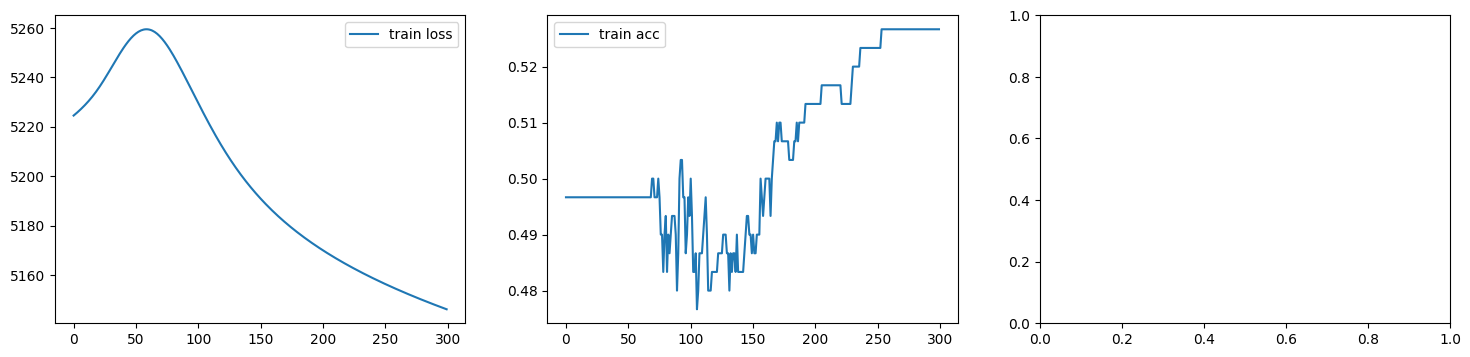

{'W1': array([[ 1.62424348, -0.61191167, -0.52823233, ..., -1.47829987,
         -0.49231334,  0.79549089],
        [-1.09534247,  2.08355045,  1.31376305, ..., -0.61779652,
          1.35047386,  0.52834714],
        [-0.65015616,  2.28481363, -0.54091511, ..., -0.52719783,
         -0.38032453,  0.94942868],
        ...,
        [-0.55875773,  0.26816693,  1.62434724, ...,  1.85999434,
          0.36024733, -0.59245211],
        [-1.12879095, -0.67974751,  0.30489659, ...,  0.36976412,
          1.03285873, -0.89630486],
        [ 0.48781464,  0.34997994, -0.0848471 , ..., -0.66648947,
          0.63545249,  1.20284081]], shape=(16, 4096)),
 'b1': array([[ 0.97833357],
        [ 0.65592266],
        [ 1.46493603],
        [ 0.82529625],
        [-0.62630814],
        [ 1.1810195 ],
        [ 0.55922845],
        [ 0.61439923],
        [-0.70540142],
        [-0.01344843],
        [-0.56921426],
        [-0.80084027],
        [-0.50061602],
        [-0.080932  ],
        [-0.22538796]

In [30]:
deep_neural_network(X_train_reshape, y_train, hidden_layers=(16, 16, 16), learning_rate=0.001, n_iter=3000)

dimensions de X: (2, 100)
dimensions de y: (1, 100)


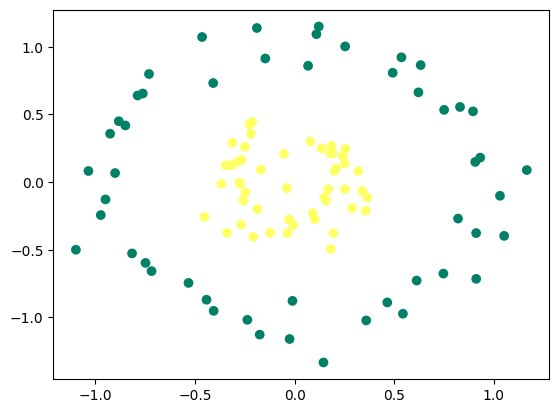

In [31]:
X, y = make_circles(n_samples=100, noise=0.1, factor=0.3, random_state=0)
X = X.T
y = y.reshape((1, y.shape[0]))

print('dimensions de X:', X.shape)
print('dimensions de y:', y.shape)

plt.scatter(X[0, :], X[1, :], c=y, cmap='summer')
plt.show()

100%|██████████| 3000/3000 [00:01<00:00, 2185.38it/s]


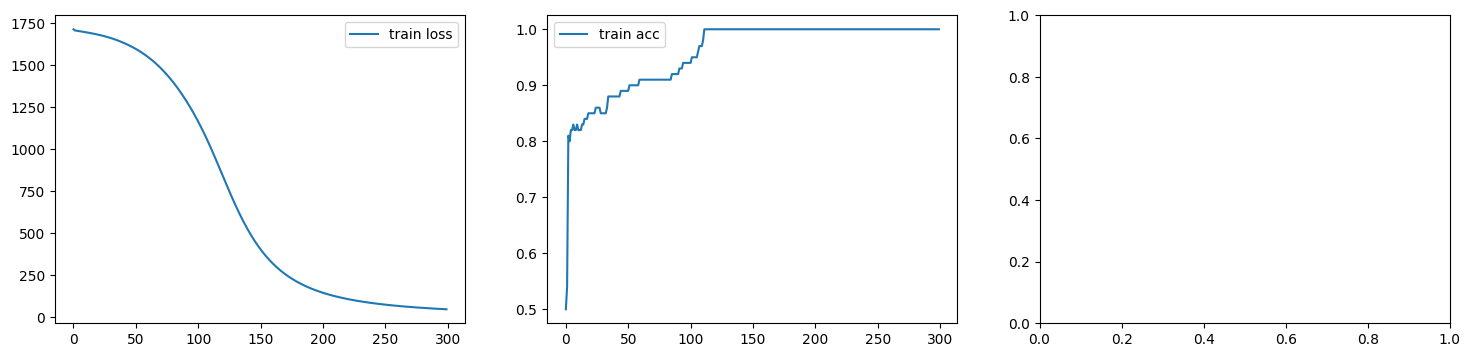

W1 (16, 2)
b1 (16, 1)
W2 (16, 16)
b2 (16, 1)
W3 (16, 16)
b3 (16, 1)
W4 (1, 16)
b4 (1, 1)


In [32]:
par = deep_neural_network(X, y, hidden_layers = (16, 16, 16), learning_rate = 0.1, n_iter = 3000)

for key, val in par.items():
    print(key, val.shape)